In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [2]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Get GPU details
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("No GPU available, using CPU")

Num GPUs Available:  0
No GPU available, using CPU


In [3]:
# Load your data
# Upload your .npy files to Colab first, then load them
data = np.load('data\mnist_data.npz')  # Shape: (20000, 32, 32, 3)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train[:,1], num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")



Training data shape: (20000, 28, 28)
Training labels shape: (20000, 2)
Test data shape: (3000, 28, 28)


In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_cat = keras.utils.to_categorical(y_train, num_classes= 10)

# normalised the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Split training into training and validation sets

In [5]:
# SPLIT INTO TRAIN AND VALIDATION SETS
from sklearn.model_selection import train_test_split
y_train_cat = keras.utils.to_categorical(y_train, num_classes = 10)

# Split training data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train_cat,
    test_size=0.2,
    random_state=42
)

print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(40000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

kernel_size = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

kernel_size = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU

kernel_size = (5, 5)
model = Sequential()
filter = 32
deep_filter = 64
deep_deep_filter = 96
deep_deep_deep_filter = 128

# Convolutional Layer
model.add(Conv2D(filters=filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.5))

model.add(Conv2D(filters=deep_filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=deep_filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\micha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Early Stopping

In [12]:
## setting for early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

## Data Augmentation

In [13]:
## data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

## Fitting the Model

In [14]:
## Fitting the model
epoch = 5
r = model.fit(train_generator,
              epochs=epoch,
              validation_data=(X_val, y_val),
              verbose = 1,
              callbacks=[early_stop]
             )

Epoch 1/5


C:\Users\micha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 163ms/step - accuracy: 0.3694 - loss: 1.8291 - val_accuracy: 0.2174 - val_loss: 2.4330
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 207ms/step - accuracy: 0.5006 - loss: 1.3720 - val_accuracy: 0.5732 - val_loss: 1.1947
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 283ms/step - accuracy: 0.5604 - loss: 1.2237 - val_accuracy: 0.5444 - val_loss: 1.3736
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.5995 - loss: 1.1172 - val_accuracy: 0.6209 - val_loss: 1.1549
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.6342 - loss: 1.0323 - val_accuracy: 0.6658 - val_loss: 0.9516


## Training loss and accuracy

In [15]:
# Evaluate on training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6762 - loss: 0.9175
Training Loss: 0.9175
Training Accuracy: 0.6762
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6658 - loss: 0.9516
Test Loss: 0.9516
Test Accuracy: 0.6658


## GenAI Tool

### GenAI Setup

In [16]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=".venv/.env")  
api_key = os.environ.get("Google_API_key")

In [17]:
from openai import OpenAI
from IPython.display import Markdown, display
import os


if api_key:
    print(f"Google API Key exists and begins {api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

Google API Key exists and begins AI


In [18]:
train_loss_val = r.history['loss']
test_loss_val = r.history['val_loss']

### GenAI Prompt

Generating a Prompt for The AI to understand full context of the model and the dataset.

In [19]:
def generate_feedback_prompt(
    model_summary,
    training_history,
    num_classes=10,
    input_shape="32x32x3",
    num_train_samples=50000,
    num_val_samples=10000,
    optimizer="adam",
    learning_rate=None,
    loss_function="categorical_crossentropy",
    batch_size=batch_size,
    epochs_trained=epoch,
    train_accuracy=train_accuracy,
    val_accuracy=test_accuracy,
    train_loss=train_loss,
    val_loss=test_loss_val[-1],
    total_params=model.count_params(),
    regularization_used=None,
    data_augmentation=True,
    early_stopping_used=True,
    additional_context=""
):
    prompt = f"""
You are acting as an **automated deep learning optimization assistant**.
Your task is to analyze a CNN trained on the **CIFAR-10 dataset** (60,000 32x32x3 images across 10 classes), and provide **expert-level feedback** to help the user improve model performance, reduce overfitting, and optimize architecture and training choices.

Below is the full model and training context:

### 📘 MODEL DETAILS
{model_summary}

- Total parameters: {total_params}
- Input shape: {input_shape}
- Number of classes: {num_classes}

### ⚙️ TRAINING CONFIGURATION
- Optimizer: {optimizer}
- Learning rate: {learning_rate}
- Loss function: {loss_function}
- Batch size: {batch_size}
- Epochs trained: {epochs_trained}
- Regularization used: {regularization_used}
- Data augmentation: {data_augmentation}
- Early stopping used: {early_stopping_used}

### 📊 DATASET INFO
- Training samples: {num_train_samples}
- Validation/test samples: {num_val_samples}

### 📈 TRAINING PERFORMANCE
- Final training accuracy: {train_accuracy}
- Final validation accuracy: {val_accuracy}
- Final training loss: {train_loss}
- Final validation loss: {val_loss}

### 🧠 TRAINING HISTORY (partial or full log)
{training_history}

### 💬 ADDITIONAL CONTEXT / CONSTRAINTS
{additional_context}

---

### 🧩 YOUR TASK
Provide **targeted, actionable recommendations** to improve the CNN model based on the provided context.
Include detailed reasoning for each suggestion.

Focus your analysis on:
1. **Architecture improvements** – e.g., depth, convolutional filter size, number of filters, activation functions, skip connections, and normalization.
2. **Regularization & generalization** – e.g., dropout, batch normalization, data augmentation, L2 weight decay, label smoothing.
3. **Optimizer and training schedule** – suggest changes like learning rate decay, adaptive optimizers, or cyclical learning rates.
4. **Training diagnostics** – identify overfitting, underfitting, or vanishing gradients from performance trends.
5. **Parameter efficiency** – if model is over-parameterized or under-powered.
6. **Augmentation & preprocessing** – improvements to data pipeline or normalization.
7. **Metric-based advice** – respond intelligently to differences between training and validation accuracy/loss.

Each suggestion needs a ranking e.g. high, medium and low, base this on importance of suggestion. 

Output your response in a dot point form with the following keys:

"""
    return prompt


messages = [{"role": "user", "content": generate_feedback_prompt(
    model.get_config(),
    model.history.history)
}]

### Calling GenAI to Assess ML Model

In [20]:
gemini = OpenAI(api_key=api_key, base_url="https://generativelanguage.googleapis.com/v1beta/openai/")
model_name = "gemini-2.0-flash"

response = gemini.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))

Okay, I will analyze the provided CNN architecture and training configuration for the CIFAR-10 dataset and provide actionable recommendations to improve its performance.

Here's my analysis and suggestions:

*   **Overall Assessment:** The model shows a significant gap between training and validation accuracy, indicating overfitting. The validation accuracy plateaus after epoch 4, suggesting early stopping is working. However, the final accuracy of 66.6% is relatively low, indicating room for improvement in both model architecture and training strategy.

**Recommendations:**

*   **Architecture Improvements:**

    *   **Increase Model Depth and Complexity (Medium):** The model is relatively shallow. Consider adding more convolutional layers and increasing the number of filters in later layers (e.g., 32 -> 64 -> 128). This allows the model to learn more complex features.
        *   **Reasoning:** CIFAR-10 is a moderately complex dataset. Deeper networks can capture more intricate patterns. However, with depth comes a higher risk of overfitting, so regularization becomes even more crucial.

    *   **Consider adding another Max Pooling Layer (Low):** Add an additional `Conv2D -> BatchNormalization -> Conv2D -> BatchNormalization -> MaxPooling2D` block to further reduce spatial dimensions.
        *   **Reasoning:** Helps further reduce spatial dimensions.

    *   **Explore different activation functions (Low):** While ReLU is generally effective, explore alternatives like LeakyReLU or ELU.
        *   **Reasoning:** These activations can help mitigate the vanishing gradient problem, especially in deeper networks.

    *   **Consider Residual Connections (Low):** Implementing residual connections (skip connections) can improve gradient flow in deeper networks and potentially improve performance.
        *   **Reasoning:** Residual connections enable the model to learn identity mappings, making optimization easier and allowing for deeper architectures.

*   **Regularization & Generalization:**

    *   **Increase Dropout Rate (High):** Increase the dropout rate in the existing Dropout layers (e.g., from 0.25 to 0.4 or 0.5). Consider adding dropout *before* the flattening layer.
        *   **Reasoning:** This helps prevent overfitting by randomly dropping neurons during training, forcing the network to learn more robust features.

    *   **Implement L2 Regularization (Weight Decay) (Medium):** Add L2 regularization to the convolutional and dense layers.
        *   **Reasoning:** L2 regularization penalizes large weights, further preventing overfitting. Can be implemented via `kernel_regularizer` argument in layers.

    *   **Enhance Data Augmentation (Medium):** Expand the data augmentation techniques. Besides the existing augmentation, include augmentations like random crops, rotations, shear transformations, and color jittering.
        *   **Reasoning:** More aggressive data augmentation helps the model generalize better to unseen data.

    *   **Label Smoothing (Low):** Experiment with label smoothing.
        *   **Reasoning:** Label smoothing reduces the model's confidence in its predictions, leading to better generalization.

*   **Optimizer and Training Schedule:**

    *   **Implement Learning Rate Decay (High):** Implement a learning rate decay schedule. This could be a step decay, exponential decay, or cosine annealing.
        *   **Reasoning:** Starting with a higher learning rate and gradually reducing it can help the model converge faster and find a better minimum.

    *   **Experiment with Different Optimizers (Medium):** While Adam is a good default, experiment with other optimizers like SGD with momentum or RMSprop.
        *   **Reasoning:** Different optimizers might be better suited for this specific task and model architecture.
        *   **Example:** SGD with a learning rate of 0.01 and a momentum of 0.9 is a good starting point to try.

    *   **Increase the number of epochs (Medium):** The model was only trained for 5 epochs and the model was still learning, increase this to 25 to 50 epochs.
        *   **Reasoning:** Early stopping will kick in to stop training once the model is no longer learning.

*   **Training Diagnostics:**

    *   **Monitor Training/Validation Curves Closely (High):** Pay close attention to the training and validation loss and accuracy curves during training. This will help you identify overfitting or underfitting early on and adjust the regularization and training schedule accordingly.
        *   **Reasoning:** This is crucial for understanding the model's behavior and making informed decisions.

*   **Parameter Efficiency:**

    *   **Consider Separable Convolutions (Low):** For reducing the number of parameters, explore using depthwise separable convolutions, especially in the earlier layers.
        *   **Reasoning:** Separable convolutions can significantly reduce the number of parameters while maintaining similar performance.

*   **Augmentation & Preprocessing:**

    *   **Standardize/Normalize Pixel Values (High):** Ensure pixel values are properly normalized (e.g., scaling them to the range [0, 1] or standardizing them to have zero mean and unit variance).
        *   **Reasoning:** Normalizing pixel values can improve the training process and lead to better convergence.

*   **Metric-based Advice:**

    *   **Address Overfitting Directly (High):** The significant difference between training and validation accuracy is a clear indicator of overfitting. The above regularization techniques are all aimed at mitigating this. Prioritize regularization techniques to combat overfitting.
        *   **Reasoning:** Closing the gap between training and validation performance is essential for improving generalization.


Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Accuracy evolution')

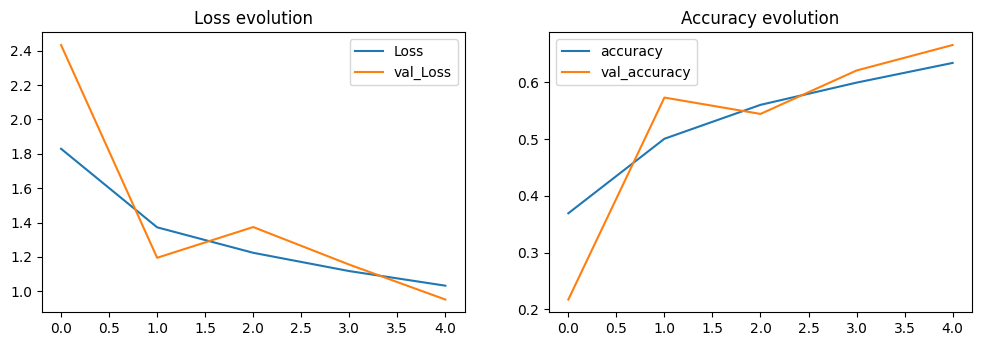

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
# Make predictions on test set
predictions = model.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:
# Create ID column
ids = np.arange(20001, 20001 + len(predictions)).reshape(-1, 1)

# Concatenate ID column with predictions
results = np.concatenate([ids, predictions], axis=1)

# Convert to DataFrame with column names
column_names = ['ID'] + [f'Class{i}' for i in range(predictions.shape[1])]
results_df = pd.DataFrame(results, columns=column_names)



In [ ]:
# Save to CSV
# Convert ID column to integer type
results_df['ID'] = results_df['ID'].astype(int)
results_df.to_csv("CNN-submission-pt2.csv", index=False)

# Display first few predictions
print("\nFirst 10 predictions:")
print(results_df.head(10))

# Optional: Save the model
model.save('resnet_model.h5')
print("\nModel saved to 'resnet_model.h5'")


First 10 predictions:
      ID        Class0    Class1        Class2        Class3        Class4  \
0  20001  3.955708e-05  0.000012  4.759216e-02  5.788257e-03  8.210395e-02   
1  20002  1.443286e-07  0.999674  2.352326e-09  4.889082e-09  1.173484e-10   
2  20003  2.945889e-03  0.000493  2.028191e-01  2.921101e-02  1.918954e-01   
3  20004  2.776332e-04  0.000109  2.584400e-02  5.533613e-01  1.553768e-02   
4  20005  3.241180e-04  0.003362  2.418623e-02  2.637264e-01  4.796295e-01   
5  20006  1.643343e-03  0.000005  2.389097e-02  1.203796e-02  8.810790e-01   
6  20007  1.881667e-01  0.004473  2.451628e-02  7.070147e-01  3.795098e-03   
7  20008  2.142021e-01  0.002144  2.316307e-01  6.000803e-03  1.384636e-01   
8  20009  2.242879e-05  0.000058  8.702299e-08  8.490134e-07  2.016161e-10   
9  20010  1.050079e-08  0.999109  9.923616e-12  5.414306e-11  6.399272e-14   

         Class5        Class6        Class7        Class8    Class9  
0  3.434508e-02  9.767968e-03  8.203292e-01  4.5